In [1]:
import pandas as pd
import numpy as np
import json 
from pandas import json_normalize 
import random 
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Cargamos el dataset con formato .json y eliminamos columnas innecesarias

df = pd.read_json('datasets/dataset_conjunto_rm.json')
df.drop(["event","id","type","version","time"], axis=1, inplace=True)

In [3]:
# Expandimos columna data

df = pd.DataFrame(json_normalize(df['data'].explode()))

In [4]:
df

,time,imei,imsi,rat
0,1596800108,35937204822971,901700000015702,2G
1,1596796932,35937204822971,901700000015700,2G
2,1596294959,35937204822971,901700000015700,2G
3,1596296538,35283606665993,901700000015702,2G
4,1596297428,35818705617048,901700000015704,2G
5,1596297758,35941008080436,901700000013634,2G
6,1596297972,35655408691613,901700000015777,2G
7,1596039825,35583902478151,901700000015766,2G
8,1596039963,35583902478151,901700000015766,2G
9,1596040938,35583902478151,901700000015766,2G


In [5]:
# Cambio de formato de time

df['time'] = pd.to_datetime(df['time'], unit='s')

In [6]:
# Separamos año, mes, dia, hora, minuto y segundo de time_data

df['year']   = df['time'].dt.year
df['month']  = df['time'].dt.month
df['day']    = df['time'].dt.day
df['hour']   = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df['second'] = df['time'].dt.second

In [7]:
# Separamos mcc, mnc y msin del IMSI

df['imsi_mcc']   = df['imsi'].str.slice(0,3)
df['imsi_mnc']  = df['imsi'].str.slice(3,5)
df['imsi_msin']    = df['imsi'].str.slice(5)

df.drop('imsi' ,axis = 1 , inplace = True)

In [8]:
# Separamos tac, fac y snr del IMEI/IMEISV

df['imei_tac+fac']   = df['imei'].str.slice(0,8)
df['imei_snr']  = df['imei'].str.slice(8)

df.drop('imei' ,axis = 1 , inplace = True)

In [9]:
# Agregamos manualmente la clasificación de cada una de los datos (0 = Normal , 1 = Anomalía)

clasf = [0,0,0,0,0,0,0,0,0,0,0,0,1,0,1]
df['clasification']=clasf

In [10]:
df = df.sort_values(by=['time'])
df.drop('time', axis = 1 , inplace = True)
df = df.reset_index(drop=True)
df

,rat,year,month,day,hour,minute,second,imsi_mcc,imsi_mnc,imsi_msin,imei_tac+fac,imei_snr,clasification
0,2G,2020,7,29,16,23,45,901,70,0000015766,35583902,478151,0
1,2G,2020,7,29,16,26,3,901,70,0000015766,35583902,478151,0
2,2G,2020,7,29,16,42,18,901,70,0000015766,35583902,478151,0
3,2G,2020,8,1,15,15,59,901,70,0000015700,35937204,822971,0
4,2G,2020,8,1,15,16,35,901,70,0000013633,35362707,574785,0
5,2G,2020,8,1,15,18,17,901,70,0000013633,35362707,574785,0
6,2G,2020,8,1,15,26,35,262,42,1122334455,35362707,574785,1
7,2G,2020,8,1,15,41,48,901,70,0000015708,01366500,442359,0
8,2G,2020,8,1,15,41,48,262,42,1122334455,35922407,923033,1
9,2G,2020,8,1,15,42,18,901,70,0000015702,35283606,665993,0


In [11]:
# StringIndexer para rat, imsi e imei

df['rat'] = pd.factorize(df['rat'].values)[0]
df['imsi_mcc'] = pd.factorize(df['imsi_mcc'].values)[0]
df['imsi_mnc'] = pd.factorize(df['imsi_mnc'].values)[0]
df['imsi_msin'] = pd.factorize(df['imsi_msin'].values)[0]
df['imei_tac+fac'] = pd.factorize(df['imei_tac+fac'].values)[0]
df['imei_snr'] = pd.factorize(df['imei_snr'].values)[0]

In [12]:
# MinMaxScaler para el tiempo
from sklearn.preprocessing import minmax_scale

year_scaled = minmax_scale(df['year'])
df['year'] = pd.DataFrame(year_scaled)

df['month'] = df['month'].apply(lambda x: (x - 1) / (12 - 1))
df['day'] = df['day'].apply(lambda x: (x - 1) / (31 - 1))
df['hour'] = df['hour'].apply(lambda x: (x - 0) / (23 - 0))
df['minute'] = df['minute'].apply(lambda x: (x - 0) / (59 - 0))
df['second'] = df['second'].apply(lambda x: (x - 0) / (59 - 0))


In [13]:
df

,rat,year,month,day,hour,minute,second,imsi_mcc,imsi_mnc,imsi_msin,imei_tac+fac,imei_snr,clasification
0,0,0.0,0.545455,0.933333,0.695652,0.389831,0.762712,0,0,0,0,0,0
1,0,0.0,0.545455,0.933333,0.695652,0.440678,0.050847,0,0,0,0,0,0
2,0,0.0,0.545455,0.933333,0.695652,0.711864,0.305085,0,0,0,0,0,0
3,0,0.0,0.636364,0.000000,0.652174,0.254237,1.000000,0,0,1,1,1,0
4,0,0.0,0.636364,0.000000,0.652174,0.271186,0.593220,0,0,2,2,2,0
5,0,0.0,0.636364,0.000000,0.652174,0.305085,0.288136,0,0,2,2,2,0
6,0,0.0,0.636364,0.000000,0.652174,0.440678,0.593220,1,1,3,2,2,1
7,0,0.0,0.636364,0.000000,0.652174,0.694915,0.813559,0,0,4,3,3,0
8,0,0.0,0.636364,0.000000,0.652174,0.694915,0.813559,1,1,3,4,4,1
9,0,0.0,0.636364,0.000000,0.652174,0.711864,0.305085,0,0,5,5,5,0


In [14]:
# Guardamos clasificación en y
y = df['clasification'].values
df.drop('clasification', axis = 1, inplace = True)

In [16]:
# Expanding rolling window count para cada una de las columnas no temporales. Se necesita que el dataset este 
# ordenado temporalmente

df['ratCount'] = df.groupby('rat').cumcount()+1
df['imsi_mccCount'] = df.groupby('imsi_mcc').cumcount()+1
df['imsi_mncCount'] = df.groupby('imsi_mnc').cumcount()+1
df['imsi_msinCount'] = df.groupby('imsi_msin').cumcount()+1
df['imei_tac+facCount'] = df.groupby('imei_tac+fac').cumcount()+1
df['imei_snrCount'] = df.groupby('imei_snr').cumcount()+1

In [17]:
df

,rat,year,month,day,hour,minute,second,imsi_mcc,imsi_mnc,imsi_msin,imei_tac+fac,imei_snr,ratCount,imsi_mccCount,imsi_mncCount,imsi_msinCount,imei_tac+facCount,imei_snrCount
0,0,0.0,0.545455,0.933333,0.695652,0.389831,0.762712,0,0,0,0,0,1,1,1,1,1,1
1,0,0.0,0.545455,0.933333,0.695652,0.440678,0.050847,0,0,0,0,0,2,2,2,2,2,2
2,0,0.0,0.545455,0.933333,0.695652,0.711864,0.305085,0,0,0,0,0,3,3,3,3,3,3
3,0,0.0,0.636364,0.000000,0.652174,0.254237,1.000000,0,0,1,1,1,4,4,4,1,1,1
4,0,0.0,0.636364,0.000000,0.652174,0.271186,0.593220,0,0,2,2,2,5,5,5,1,1,1
5,0,0.0,0.636364,0.000000,0.652174,0.305085,0.288136,0,0,2,2,2,6,6,6,2,2,2
6,0,0.0,0.636364,0.000000,0.652174,0.440678,0.593220,1,1,3,2,2,7,1,1,1,3,3
7,0,0.0,0.636364,0.000000,0.652174,0.694915,0.813559,0,0,4,3,3,8,7,7,1,1,1
8,0,0.0,0.636364,0.000000,0.652174,0.694915,0.813559,1,1,3,4,4,9,2,2,2,1,1
9,0,0.0,0.636364,0.000000,0.652174,0.711864,0.305085,0,0,5,5,5,10,8,8,1,1,1


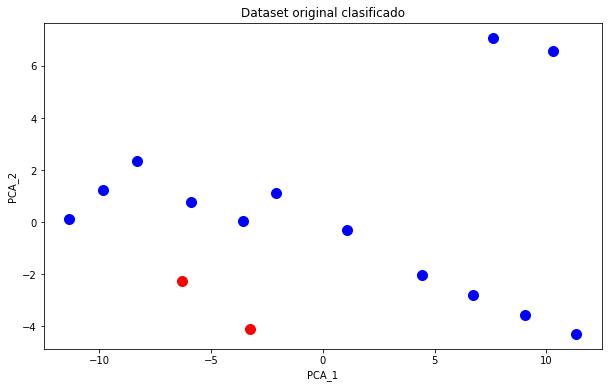

In [18]:
# Visualizacion 2D y 3D mediante PCA de los resultados arrojados por KMeans

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

fig, ax = plt.subplots(figsize=(10, 6))

for index, n_color in enumerate(y):
    ax.scatter(df_pca[index,0],df_pca[index,1], s=100, c="blue" if n_color == 0 else "red")
    
ax.set_title('Dataset original clasificado')
ax.set_xlabel('PCA_1')
ax.set_ylabel('PCA_2')

plt.style.use('seaborn')
plt.show()